In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:

%matplotlib inline
import matplotlib.dates

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [87]:
movies=pd.read_csv("./ml-dataset/movies.csv")

In [88]:
len(movies)

27278

In [6]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [7]:
links=pd.read_csv("ml-dataset/links.csv")
links.head(10)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


In [8]:
ratings=pd.read_csv("ml-dataset/ratings.csv")
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
5,1,112,3.5,1094785740
6,1,151,4.0,1094785734
7,1,223,4.0,1112485573
8,1,253,4.0,1112484940
9,1,260,4.0,1112484826


In [9]:
# # Switching to matrix calculation for speed; drop records without ratings
# final = pd.merge(movies, ratings, on='movieId', how='left')

In [10]:
import re

In [11]:
movies['release_year'] = movies['title'].str.strip().str.extract(r'^.*(\d{4})(.*)$')[0]

C:\Users\Yonge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [12]:
movies['release_year'] = movies[movies['release_year'].notnull()]['release_year'].astype(int)

In [13]:
movies['release_year'][0]

1995.0

# Filtering

In [14]:
# years=[]
# import numpy as np
# for i in range(len(movies)):
#     title=movies.iloc[i]["title"]
#     if "(" in title:
#         try:
#             year=int(movies.iloc[i]["title"].rsplit("(",1)[1].split(")")[0])
#         except ValueError:
#             year=np.nan
#     years.append(year)

In [15]:
movies_new = movies[movies.release_year > 2008]

In [16]:
#movies[movies.release_year > 2008].to_csv('./ml-dataset/movies10.csv')

In [17]:
movies_new.release_year.value_counts()

2009.0    1114
2012.0    1022
2011.0    1016
2013.0    1011
2010.0     962
2014.0     740
2015.0     120
Name: release_year, dtype: int64

# Link to tmdb

In [18]:
last_10yr_id = pd.Series(movies_new.movieId.unique())

In [19]:
last_10yr_id.to_csv('mID.csv', index=False)

# Genres

In [20]:
# years_sr=pd.Series(years)

In [21]:
# movies["release_year"]=years_sr.values
movies.head(5)

,movieId,title,genres,release_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


In [22]:
genres=movies["genres"]

In [23]:
genre=list(genres)

In [24]:
genres_list=[]
for g in genre:
    items=g.split("|")
    for item in items:
        if item in genres_list:
            pass
        else:
            genres_list.append(item)
print(genres_list)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir', '(no genres listed)']


In [25]:
for genre in genres_list:
    movies[genre]=0

Text(0.5,1,'Number of movies over time')

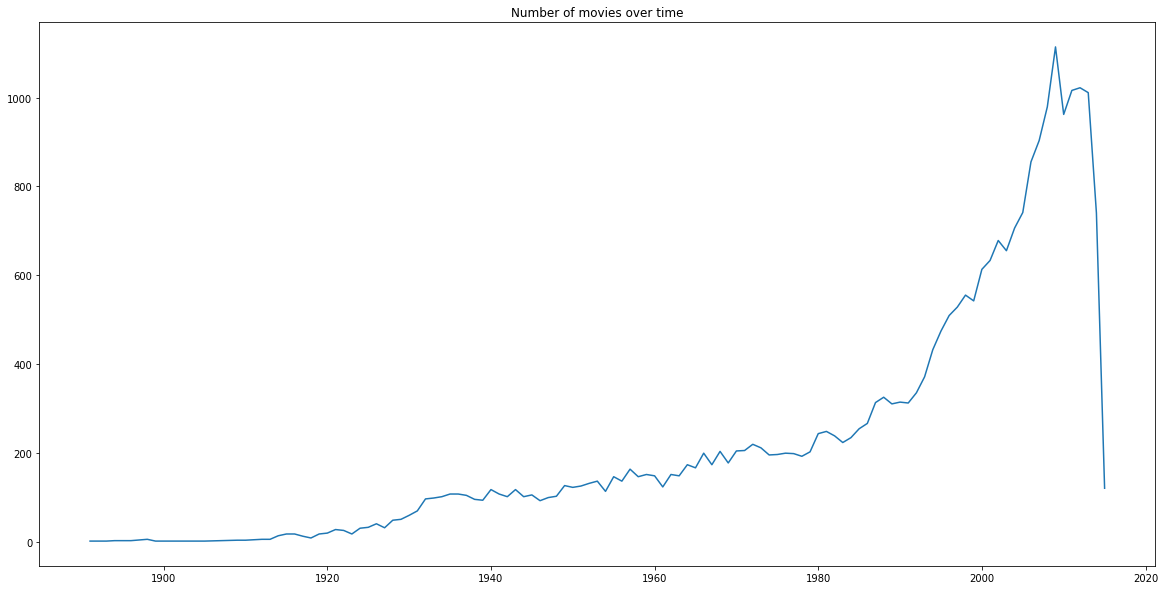

In [26]:
ax = movies.release_year.value_counts().sort_index().plot(figsize=(20,10))
ax.set_title('Number of movies over time')

In [27]:
movies.head()

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
def genre(x):
    for g in movies.columns[4:]:
        if g in x['genres']:
            x[g] = 1
    return x

In [29]:
movies1 = movies.apply(func = genre, axis = 1)

In [30]:
movies1.head()

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
max_yr=int(movies["release_year"].max())
min_yr=int(movies["release_year"].min())
print(min_yr,max_yr)

1891 2015


In [32]:
# all_years=[]
# for i in range(min_yr,max_yr+1):
#     all_years.append(i)
# print(all_years)
movies['release_year'].unique()

array([1995., 1994., 1996., 1976., 1992., 1988., 1967., 1993., 1964.,
       1977., 1965., 1982., 1985., 1990., 1991., 1989., 1937., 1940.,
       1969., 1981., 1973., 1970., 1960., 1955., 1959., 1968., 1980.,
       1975., 1986., 1948., 1943., 1950., 1946., 1987., 1997., 1974.,
       1956., 1958., 1949., 1972., 1998., 1933., 1952., 1951., 1957.,
       1961., 1954., 1934., 1944., 1963., 1942., 1941., 1953., 1939.,
       1947., 1945., 1938., 1935., 1936., 1926., 1932., 1979., 1971.,
       1978., 1966., 1962., 1983., 1984., 1931., 1922., 1999., 1927.,
       1929., 1930., 1928., 1925., 1914., 2000., 1919., 1923., 1920.,
       1918., 1921., 2001., 1924., 2002., 2003., 1915., 2004., 1916.,
       1917., 2005., 2006., 1902.,   nan, 1903., 2007., 2008., 2009.,
       1912., 2010., 1913., 2011., 1898., 1899., 1894., 2012., 1909.,
       1910., 1901., 1893., 2013., 1896., 2014., 1895., 2015., 1900.,
       1905., 1891.])

In [33]:
movies1.head()

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
movies_melt = movies1.melt(id_vars=['movieId', 'title', 'genres', 'release_year'], var_name='genre')

In [35]:
graph = movies_melt.pivot_table(index = ['release_year'], columns=['genre'], values=['value'], aggfunc = np.sum)

In [36]:
graph.columns = graph.columns.get_level_values(1)

In [37]:
graph.index.max()

2015.0

In [38]:
min(graph.index)

1891.0

In [39]:
graph

genre,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1891.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1893.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1894.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1895.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1896.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1898.0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1899.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1901.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


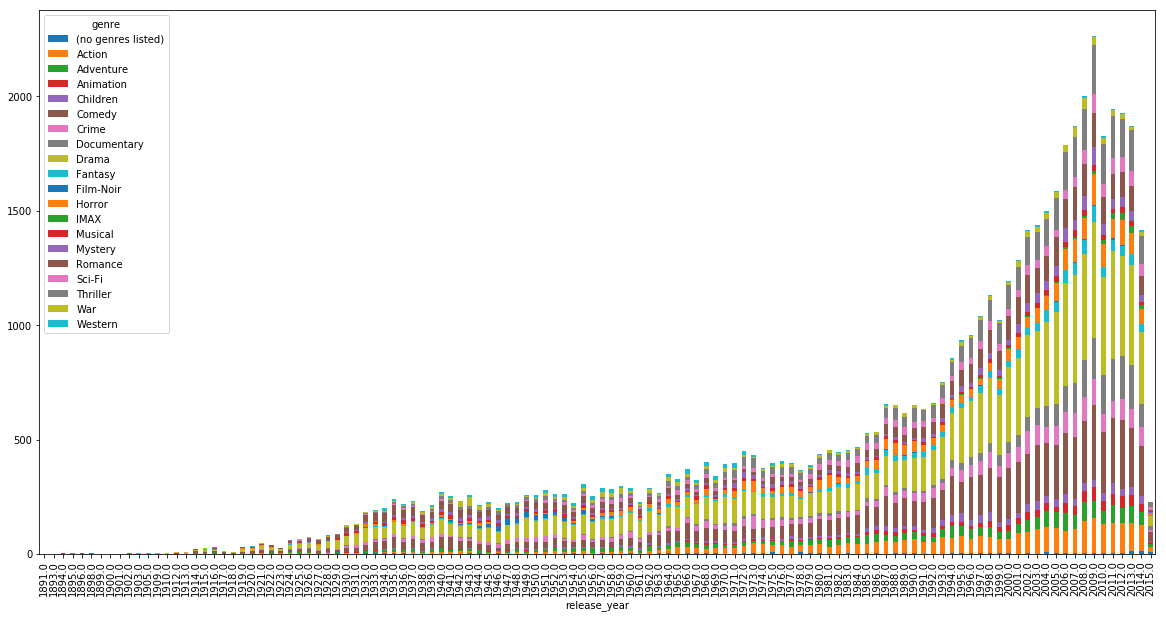

In [40]:

plt.figure()
graph.plot.bar(stacked=True,figsize=(20,10))


plt.show()

In [41]:
new_movies=movies.copy()

# Movies

In [42]:
movies.head()

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
movies_new.head()

,movieId,title,genres,release_year
12856,60684,Watchmen (2009),Action|Drama|Mystery|Sci-Fi|Thriller|IMAX,2009.0
13033,62265,"Accidental Husband, The (2009)",Comedy|Romance,2009.0
13101,63072,"Road, The (2009)",Adventure|Drama|Thriller,2009.0
13338,65585,Bride Wars (2009),Comedy|Romance,2009.0
13341,65601,My Bloody Valentine 3-D (2009),Horror|Thriller,2009.0


# Ratings

In [44]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'],unit='s')

In [45]:
ratings['year'] = ratings['timestamp'].dt.year

In [46]:
ratings['month'] = ratings['timestamp'].dt.month

In [47]:
ratings['day'] = ratings['timestamp'].dt.day

In [48]:
ratings['hour'] = ratings['timestamp'].dt.hour

In [49]:
ratings['dow'] = ratings['timestamp'].dt.weekday

## Ratings over time

Text(0,0.5,'Rating')

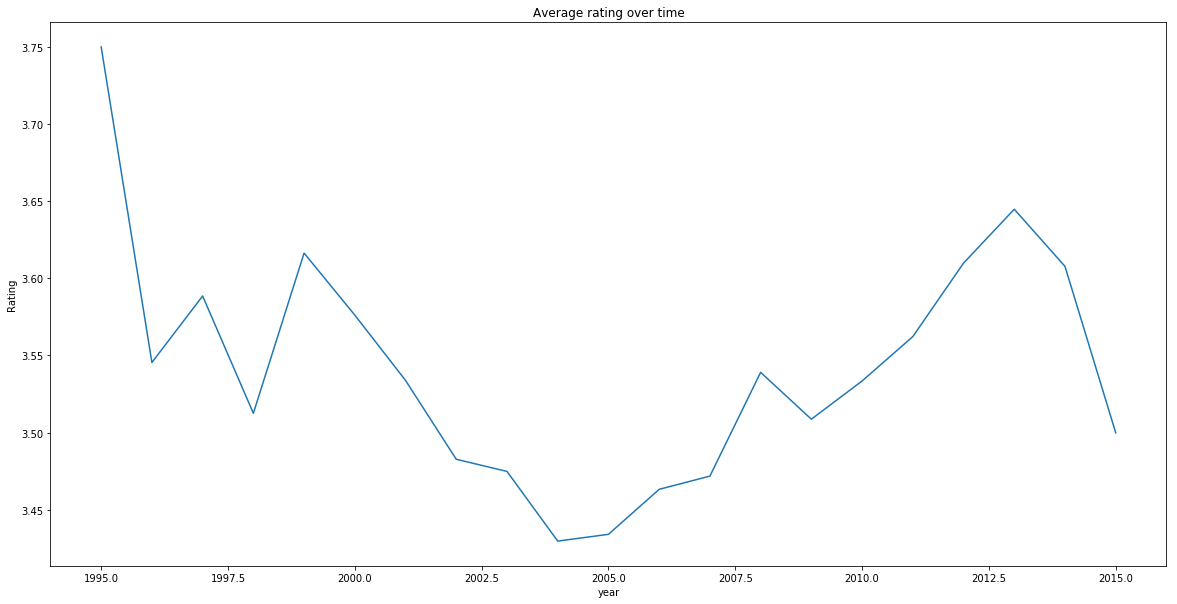

In [50]:
rating_year_month = ratings.groupby(['year'])['rating'].mean()
ax = rating_year_month.plot(figsize=(20,10))
ax.set_title('Average rating over time')
ax.set_ylabel('Rating')

Variation between months does not appear significant

Text(0,0.5,'Rating')

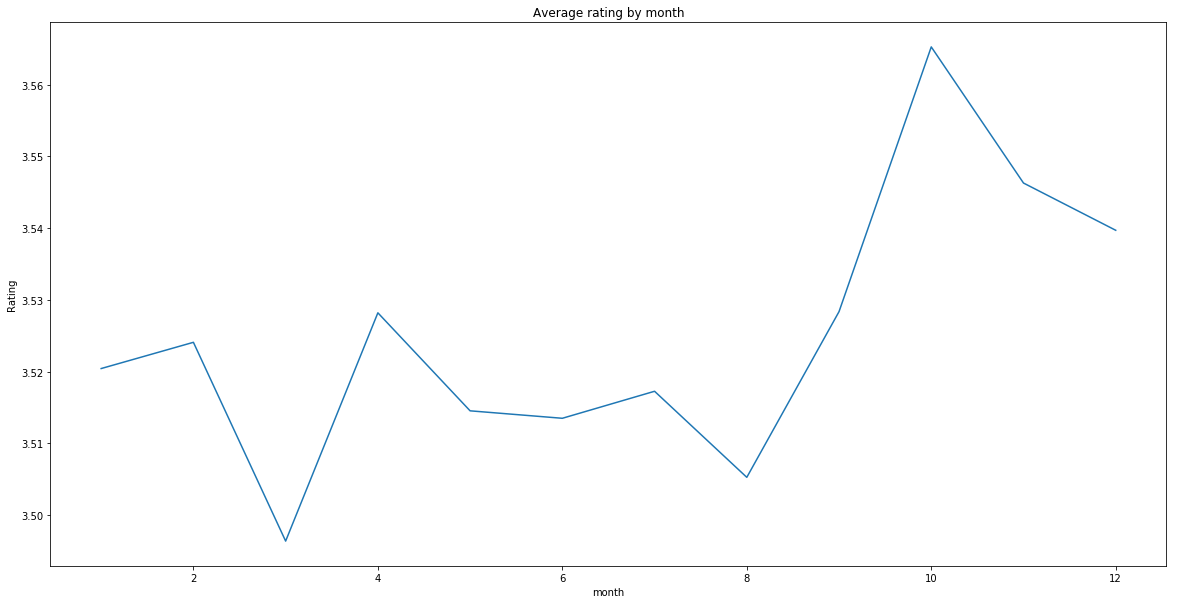

In [51]:
rating_year_month = ratings.groupby(['month'])['rating'].mean()
ax = rating_year_month.plot(figsize=(20,10))
ax.set_title('Average rating by month')
ax.set_ylabel('Rating')

Ratings already bucketed into intervals of 0.5
Average ratings between 3 and 4

Text(0,0.5,'Freq')

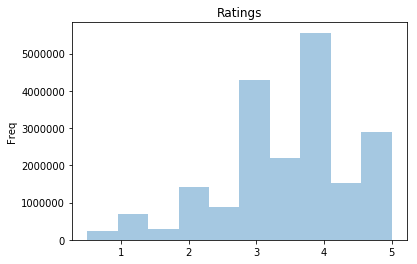

In [52]:
sns.distplot(ratings['rating'],kde = False, bins=10,
            hist_kws={"rwidth":1,})
plt.title('Ratings')
plt.xlabel('')
plt.ylabel('Freq')

Ratings appear slightly higher over the later part of the week

In [53]:
pd.DataFrame(ratings.groupby('dow')['rating'].median()).transpose()

dow,0,1,2,3,4,5,6
rating,3.5,3.5,3.5,3.5,4.0,4.0,4.0


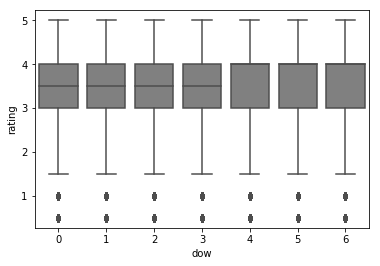

In [54]:
sns.boxplot(x='dow', y="rating", data=ratings,
            color='grey')

# TMDB

In [55]:
tmovies=pd.read_csv("./ml-dataset/tmovies.csv")

In [56]:
tmovies['release_date'] = pd.to_datetime(tmovies['release_date'])

In [57]:
tmovies['year'] = tmovies.release_date.dt.year
tmovies['month'] = tmovies.release_date.dt.month
tmovies['dow'] = tmovies.release_date.dt.weekday

In [58]:
tmovies.head()

,Unnamed: 0,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,month,dow
0,0,False,/ok6Ws65nDSLAIKkKgIjqyM5OGCc.jpg,NaN,130000000,"[{'id': 28, 'name': 'Action'}, {'id': 9648, 'n...",https://www.warnerbros.com/watchmen,13183,tt0409459,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Justice is coming to all of us. No matter wha...,Watchmen,False,7.2,3918,2009.0,3.0,3.0
1,0,False,/mBVyrtzC2aHkPfbN8iKXCwJRaKE.jpg,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,13401,tt0809504,en,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,The Accidental Husband,False,5.3,248,2008.0,2.0,4.0
2,0,False,/pUNlJ6jzDsgUvPjJeFfsyyOSZJx.jpg,NaN,32000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",http://www.theroad-movie.com/,20766,tt0898367,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,In a moment the world changed forever.,The Road,False,6.9,1496,2009.0,11.0,2.0
3,0,False,/f7pTesNnPjOVAq7QqhgnSHaK9Cc.jpg,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.bridewars.com,10521,tt0901476,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,May the best bride win,Bride Wars,False,6.0,1281,2009.0,1.0,4.0
4,0,False,/3ggNo1od6Rs1eJwhU3TkwJi3wbi.jpg,"{'id': 264437, 'name': 'My Bloody Valentine Co...",15000000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",http://www.mybloodyvalentinein3d.com/,14435,tt1179891,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He's gonna break your heart.,My Bloody Valentine,False,5.3,433,2009.0,1.0,4.0


Data for tmdb available mainly from 2009

You! Since starting this project in 2008, we've been lucky enough to have users just like you add and edit missing/incorrect data. Think of TMDb as a very specialised version of Wikipedia where everything is editable but very specialised around only movie, TV and actor data. We started with an initial data contribution from a project called omdb with only 10,000 movies in 2009. Everything added and edited since then has been users just like you!


In [59]:
tmovies = tmovies[(tmovies['year'] >= 2009) & (tmovies['year'] < 2016)]

In [60]:
tmovies['year'].value_counts()

2013.0    1032
2009.0    1018
2011.0    1007
2012.0     981
2010.0     929
2014.0     745
2015.0     114
Name: year, dtype: int64

In [61]:
tmovies.groupby('year')['revenue'].mean()

year
2009.0    2.280708e+07
2010.0    2.514457e+07
2011.0    2.361051e+07
2012.0    2.614530e+07
2013.0    2.531662e+07
2014.0    3.456063e+07
2015.0    3.406507e+07
Name: revenue, dtype: float64

## Revenue

Text(0,0.5,'Revenue (USD)')

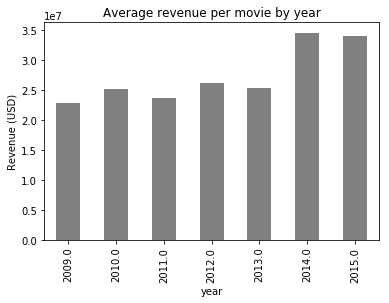

In [62]:
ax = tmovies.groupby('year')['revenue'].mean().plot(kind='bar', color='grey')
ax.set_title('Average revenue per movie by year')
ax.set_ylabel('Revenue (USD)')


## Budget

Text(0,0.5,'Budget (USD)')

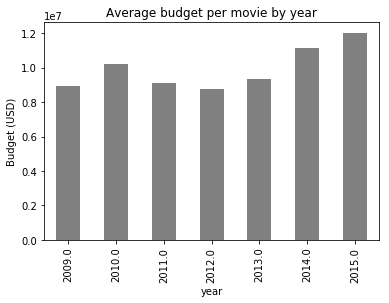

In [63]:
ax = tmovies.groupby('year')['budget'].mean().plot(kind='bar', color='grey')
ax.set_title('Average budget per movie by year')
ax.set_ylabel('Budget (USD)')


## Profit / Loss

On average, movies appear to have been profitable, making USD 15M per movie in 2010 and greater than USD 20M by 2015

In [67]:
tmovies['pl'] = tmovies['revenue'] - tmovies['budget']

In [68]:
tmovies

,Unnamed: 0,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,status,tagline,title,video,vote_average,vote_count,year,month,dow,pl
0,0.0,0.0,/ok6Ws65nDSLAIKkKgIjqyM5OGCc.jpg,NaN,130000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 9648, 'n...",https://www.warnerbros.com/watchmen,13183.0,tt0409459,en,...,Released,Justice is coming to all of us. No matter wha...,Watchmen,0.0,7.2,3918.0,2009.0,3.0,3.0,55258983.0
2,0.0,0.0,/pUNlJ6jzDsgUvPjJeFfsyyOSZJx.jpg,NaN,32000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",http://www.theroad-movie.com/,20766.0,tt0898367,en,...,Released,In a moment the world changed forever.,The Road,0.0,6.9,1496.0,2009.0,11.0,2.0,-4364695.0
3,0.0,0.0,/f7pTesNnPjOVAq7QqhgnSHaK9Cc.jpg,NaN,30000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.bridewars.com,10521.0,tt0901476,en,...,Released,May the best bride win,Bride Wars,0.0,6.0,1281.0,2009.0,1.0,4.0,84663461.0
4,0.0,0.0,/3ggNo1od6Rs1eJwhU3TkwJi3wbi.jpg,"{'id': 264437, 'name': 'My Bloody Valentine Co...",15000000.0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",http://www.mybloodyvalentinein3d.com/,14435.0,tt1179891,en,...,Released,He's gonna break your heart.,My Bloody Valentine,0.0,5.3,433.0,2009.0,1.0,4.0,87836002.0
5,0.0,0.0,/gVfnoiCJBdv2SN7poIbU7eyNVq1.jpg,"{'id': 2326, 'name': 'Underworld Collection', ...",35000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",NaN,12437.0,tt0834001,en,...,Released,Every war has a beginning.,Underworld: Rise of the Lycans,0.0,6.3,1819.0,2009.0,1.0,3.0,56353501.0
6,0.0,0.0,/v0emjNwZGlhKhELLmkvaAjCqje9.jpg,"{'id': 328372, 'name': 'Mall Cop Collection', ...",26000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://paulblartmallcop.com/,14560.0,tt1114740,en,...,Released,Safety Never Takes A Holiday.,Paul Blart: Mall Cop,0.0,5.3,1073.0,2009.0,1.0,3.0,157293131.0
7,0.0,0.0,/xBug003nu97sBYaHzXox2PVR6Mw.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",http://www.notorious09.com,14410.0,tt0472198,en,...,Released,No dream is too B.I.G.,Notorious,0.0,6.7,228.0,2009.0,1.0,4.0,43051547.0
8,0.0,0.0,/6tiWjJPSwBIiQiosOQ0oqJe8UHB.jpg,NaN,16000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.theunbornmovie.net/,13788.0,tt1139668,en,...,Released,Evil will do anything to live.,The Unborn,0.0,4.9,545.0,2009.0,1.0,4.0,60514050.0
9,0.0,0.0,/4I4v7bcF9fjuWzFSPjfLxZCd5Xn.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",http://www.uninvitedmovie.com,14254.0,tt0815245,en,...,Released,Can you believe what you see?,The Uninvited,0.0,6.3,594.0,2009.0,1.0,4.0,41624046.0
10,0.0,0.0,/neRyRVmIOrulysfTjjOgUQGHbdn.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,14549.0,tt1020055,en,...,Released,NaN,Night Train,0.0,5.5,64.0,2009.0,4.0,2.0,0.0


Text(0,0.5,'Budget (USD)')

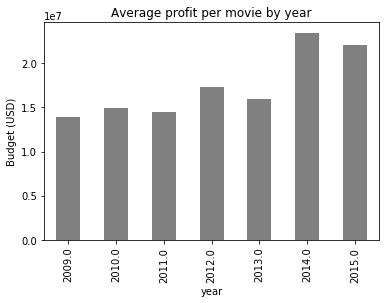

In [69]:
ax = tmovies.groupby('year')['pl'].mean().plot(kind='bar', color='grey')
ax.set_title('Average profit per movie by year')
ax.set_ylabel('Budget (USD)')

## Votes

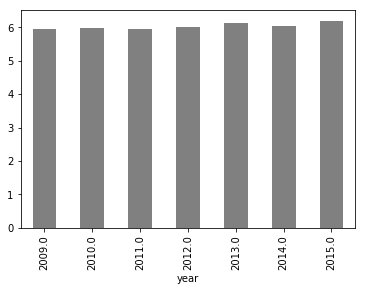

In [70]:
tmovies.groupby('year')['vote_average'].mean().plot(kind='bar', color='grey')

# Join tmovies into movies

In [71]:
movies.head()

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [73]:
tmovies.head()

,Unnamed: 0,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,status,tagline,title,video,vote_average,vote_count,year,month,dow,pl
0,0.0,0.0,/ok6Ws65nDSLAIKkKgIjqyM5OGCc.jpg,NaN,130000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 9648, 'n...",https://www.warnerbros.com/watchmen,13183.0,tt0409459,en,...,Released,Justice is coming to all of us. No matter wha...,Watchmen,0.0,7.2,3918.0,2009.0,3.0,3.0,55258983.0
2,0.0,0.0,/pUNlJ6jzDsgUvPjJeFfsyyOSZJx.jpg,NaN,32000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",http://www.theroad-movie.com/,20766.0,tt0898367,en,...,Released,In a moment the world changed forever.,The Road,0.0,6.9,1496.0,2009.0,11.0,2.0,-4364695.0
3,0.0,0.0,/f7pTesNnPjOVAq7QqhgnSHaK9Cc.jpg,NaN,30000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.bridewars.com,10521.0,tt0901476,en,...,Released,May the best bride win,Bride Wars,0.0,6.0,1281.0,2009.0,1.0,4.0,84663461.0
4,0.0,0.0,/3ggNo1od6Rs1eJwhU3TkwJi3wbi.jpg,"{'id': 264437, 'name': 'My Bloody Valentine Co...",15000000.0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",http://www.mybloodyvalentinein3d.com/,14435.0,tt1179891,en,...,Released,He's gonna break your heart.,My Bloody Valentine,0.0,5.3,433.0,2009.0,1.0,4.0,87836002.0
5,0.0,0.0,/gVfnoiCJBdv2SN7poIbU7eyNVq1.jpg,"{'id': 2326, 'name': 'Underworld Collection', ...",35000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",NaN,12437.0,tt0834001,en,...,Released,Every war has a beginning.,Underworld: Rise of the Lycans,0.0,6.3,1819.0,2009.0,1.0,3.0,56353501.0


In [83]:
df = movies_new.merge(links, left_on='movieId', right_on='movieId', how='left')\
        .merge(tmovies, left_on='tmdbId', right_on='id', how='left', suffixes=('','_t'))

In [84]:
df.columns

Index(['movieId', 'title', 'genres', 'release_year', 'imdbId', 'tmdbId',
       'Unnamed: 0', 'adult', 'backdrop_path', 'belongs_to_collection',
       'budget', 'genres_t', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title_t', 'video', 'vote_average', 'vote_count', 'year', 'month',
       'dow', 'pl'],
      dtype='object')

In [85]:
df

,movieId,title,genres,release_year,imdbId,tmdbId,Unnamed: 0,adult,backdrop_path,belongs_to_collection,...,status,tagline,title_t,video,vote_average,vote_count,year,month,dow,pl
0,60684,Watchmen (2009),Action|Drama|Mystery|Sci-Fi|Thriller|IMAX,2009.0,409459,13183.0,0.0,0.0,/ok6Ws65nDSLAIKkKgIjqyM5OGCc.jpg,NaN,...,Released,Justice is coming to all of us. No matter wha...,Watchmen,0.0,7.2,3918.0,2009.0,3.0,3.0,55258983.0
1,62265,"Accidental Husband, The (2009)",Comedy|Romance,2009.0,809504,13401.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63072,"Road, The (2009)",Adventure|Drama|Thriller,2009.0,898367,20766.0,0.0,0.0,/pUNlJ6jzDsgUvPjJeFfsyyOSZJx.jpg,NaN,...,Released,In a moment the world changed forever.,The Road,0.0,6.9,1496.0,2009.0,11.0,2.0,-4364695.0
3,65585,Bride Wars (2009),Comedy|Romance,2009.0,901476,10521.0,0.0,0.0,/f7pTesNnPjOVAq7QqhgnSHaK9Cc.jpg,NaN,...,Released,May the best bride win,Bride Wars,0.0,6.0,1281.0,2009.0,1.0,4.0,84663461.0
4,65601,My Bloody Valentine 3-D (2009),Horror|Thriller,2009.0,1179891,14435.0,0.0,0.0,/3ggNo1od6Rs1eJwhU3TkwJi3wbi.jpg,"{'id': 264437, 'name': 'My Bloody Valentine Co...",...,Released,He's gonna break your heart.,My Bloody Valentine,0.0,5.3,433.0,2009.0,1.0,4.0,87836002.0
5,65682,Underworld: Rise of the Lycans (2009),Action|Fantasy|Horror|Thriller,2009.0,834001,12437.0,0.0,0.0,/gVfnoiCJBdv2SN7poIbU7eyNVq1.jpg,"{'id': 2326, 'name': 'Underworld Collection', ...",...,Released,Every war has a beginning.,Underworld: Rise of the Lycans,0.0,6.3,1819.0,2009.0,1.0,3.0,56353501.0
6,65802,Paul Blart: Mall Cop (2009),Action|Comedy|Crime,2009.0,1114740,14560.0,0.0,0.0,/v0emjNwZGlhKhELLmkvaAjCqje9.jpg,"{'id': 328372, 'name': 'Mall Cop Collection', ...",...,Released,Safety Never Takes A Holiday.,Paul Blart: Mall Cop,0.0,5.3,1073.0,2009.0,1.0,3.0,157293131.0
7,65810,Notorious (2009),Drama|Musical,2009.0,472198,14410.0,0.0,0.0,/xBug003nu97sBYaHzXox2PVR6Mw.jpg,NaN,...,Released,No dream is too B.I.G.,Notorious,0.0,6.7,228.0,2009.0,1.0,4.0,43051547.0
8,65813,"Unborn, The (2009)",Horror|Mystery|Thriller,2009.0,1139668,13788.0,0.0,0.0,/6tiWjJPSwBIiQiosOQ0oqJe8UHB.jpg,NaN,...,Released,Evil will do anything to live.,The Unborn,0.0,4.9,545.0,2009.0,1.0,4.0,60514050.0
9,65882,"Uninvited, The (2009)",Drama|Horror|Mystery|Thriller,2009.0,815245,14254.0,0.0,0.0,/4I4v7bcF9fjuWzFSPjfLxZCd5Xn.jpg,NaN,...,Released,Can you believe what you see?,The Uninvited,0.0,6.3,594.0,2009.0,1.0,4.0,41624046.0
